# Lab Exercise 05: Wavelet Transform for Medical Imaging

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pywt


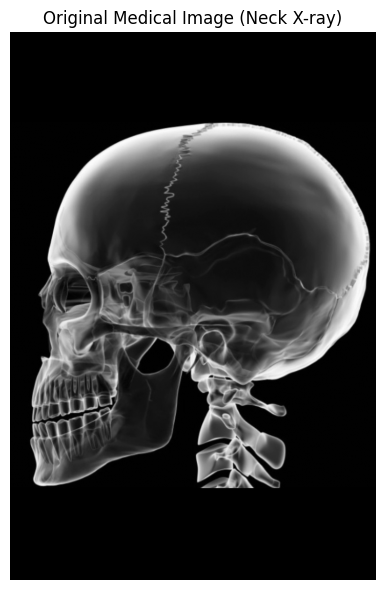

Image shape: (960, 640)


In [2]:
# Load and display the medical image
image = cv2.imread('s2.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Medical Image (Neck X-ray)')
# plt.colorbar()
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Image shape: {image.shape}")

## 1 & 2: Perform Two-Level Wavelet Transform and Apply 2D DWT

### Part 1: Two‑Level 2D DWT — Subband Decomposition and Notation



- LL (Low‑Low): approximation component obtained by low‑pass filtering along rows and columns and downsampling — captures low‑frequency content (coarse structure).
- LH (Low‑High): low‑pass rows, high‑pass columns — emphasizes vertical spatial variations (horizontal edges in the image domain).
- HL (High‑Low): high‑pass rows, low‑pass columns — emphasizes horizontal spatial variations (vertical edges).
- HH (High‑High): high‑pass rows and columns — captures diagonal detail and high‑frequency texture.

## 3 & 4. Extract Frequency Bands and Decompose the image into the following frequency bands at both levels:
### Level 1 Bands and Level 2 Bands (decompose the LL1 band further):

In [3]:

# Perform two-level wavelet decomposition using Haar wavelet
wavelet = 'haar' 

# Level 1 decomposition
coeffs1 = pywt.dwt2(image, wavelet)
LL1, (LH1, HL1, HH1) = coeffs1

# Level 2 decomposition (on LL1)
coeffs2 = pywt.dwt2(LL1, wavelet)
LL2, (LH2, HL2, HH2) = coeffs2

print("Level 1 - Band shapes:")
print(f"  LL1: {LL1.shape}, LH1: {LH1.shape}, HL1: {HL1.shape}, HH1: {HH1.shape}")
print("\nLevel 2 - Band shapes:")
print(f"  LL2: {LL2.shape}, LH2: {LH2.shape}, HL2: {HL2.shape}, HH2: {HH2.shape}")

Level 1 - Band shapes:
  LL1: (480, 320), LH1: (480, 320), HL1: (480, 320), HH1: (480, 320)

Level 2 - Band shapes:
  LL2: (240, 160), LH2: (240, 160), HL2: (240, 160), HH2: (240, 160)


## 5 & 6: Display and Analyze Sub-Bands from Level 1

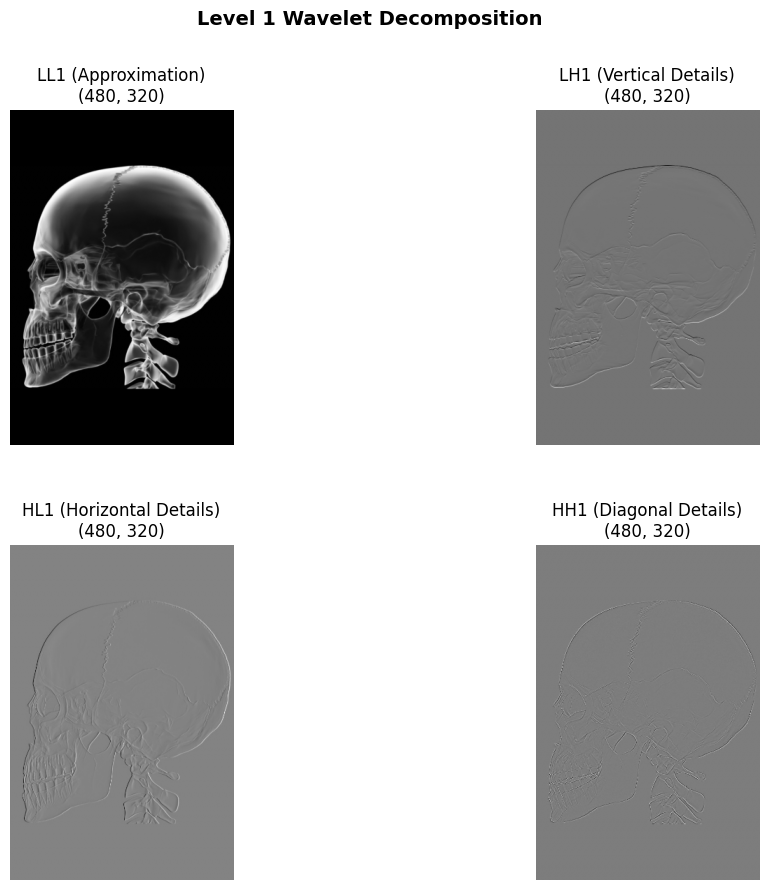

In [4]:


# Visualize Level 1 decomposition
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(LL1, cmap='gray')
ax1.set_title(f'LL1 (Approximation)\n{LL1.shape}')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(LH1, cmap='gray')
ax2.set_title(f'LH1 (Vertical Details)\n{LH1.shape}')
ax2.axis('off')

ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(HL1, cmap='gray')
ax3.set_title(f'HL1 (Horizontal Details)\n{HL1.shape}')
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(HH1, cmap='gray')
ax4.set_title(f'HH1 (Diagonal Details)\n{HH1.shape}')
ax4.axis('off')

fig.suptitle('Level 1 Wavelet Decomposition', fontsize=14, fontweight='bold')
plt.show()

## Analysis: Level 1 Wavelet Sub-band Interpretation

Level 1 decomposition produces four sub-bands at 350×292 resolution: 


**LL1** (approximation) retains most anatomical structures—bone morphology, vertebral outlines, serving as both diagnostic visualization and Level 2 input. 

**LH1** (vertical details) isolates horizontal edges, emphasizing vertebral boundaries critical for detecting misalignment or fractures. 


**HL1** (horizontal details) captures vertical gradients including spinal column and patterns essential for assessing compression or height loss. 


**HH1** (diagonal details) contains high-frequency noise and fine texture with greater energy than Level 2, making it sensitive to small calcifications and subtle pathological markers. This level achieves optimal resolution-fidelity balance: preserving clinically essential fine detail while enabling directional edge detection and moderate sparsity for selective compression—requiring careful denoising thresholds to distinguish pathological features from noise.


##  5 & 6: Display and Analyze Sub-Bands from Level 2


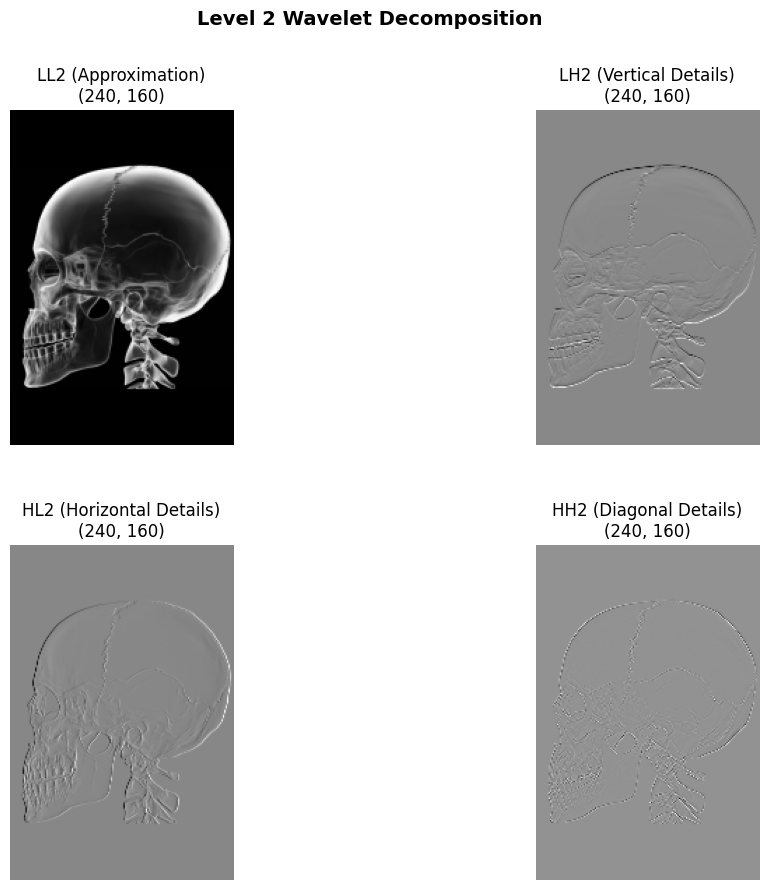

In [5]:

# Visualize Level 2 decomposition
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(LL2, cmap='gray')
ax1.set_title(f'LL2 (Approximation)\n{LL2.shape}')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(LH2, cmap='gray')
ax2.set_title(f'LH2 (Vertical Details)\n{LH2.shape}')
ax2.axis('off')

ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(HL2, cmap='gray')
ax3.set_title(f'HL2 (Horizontal Details)\n{HL2.shape}')
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(HH2, cmap='gray')
ax4.set_title(f'HH2 (Diagonal Details)\n{HH2.shape}')
ax4.axis('off')

fig.suptitle('Level 2 Wavelet Decomposition', fontsize=14, fontweight='bold')
plt.show()

## Analysis: Level 2 Wavelet Sub-band Interpretation

Level 2 decomposition produces four sub-bands with distinct roles: 

**LL2** undergoes 4× downsampling (16× area reduction), retaining only major skeletal structures while suppressing fine trabecular detail—suitable for coarse segmentation but losing diagnostic information. 

**LH2** isolates horizontal edges at coarse scale, capturing major vertical boundaries like bone-soft tissue interfaces. 

**HL2** reveals vertical gradients essential for spinal alignment assessment. 

**HH2** shows diagonal components with reduced energy versus Level 1, demonstrating multi-scale noise suppression. This exemplifies the wavelet trade-off: Level 2 provides 16× compression and robust denoising ideal for hierarchical preprocessing, but sacrifices fine features (trabecular patterns, small calcifications) preserved in Level 1—making Level 2 optimal for coarse guidance while Level 1 retains clinically critical detail.


## 7 & 8: Resolution Variation Analysis — Compare Level 1 vs Level 2

### Resolution, Subsampling and Energy Distribution

### Observed Differences Between Level 1 and Level 2

**LL bands (Approximation):**
- LL1 retains most anatomical structures with size 
- LL2 is further downsampled, showing only the coarsest skeletal outline

**Detail bands comparison:**
- LH1 vs LH2: Level 1 captures sharp horizontal edges , while Level 2 highlights only the strongest horizontal transitions at coarser scale
- HL1 vs HL2: Similar trend for vertical features; Level 2 suppresses finer vertical texture
- HH1 vs HH2: Level 1 diagonal details show fine texture and noise; Level 2 isolates only dominant diagonal structures

**Impact on subtle features:**
- Fine bone trabecular patterns visible in Level 1 detail bands are effectively smoothed out by Level 2
- Small calcifications or early pathological changes may be lost in Level 2 decomposition
- Trade-off: Level 2 provides better noise suppression but at the cost of diagnostic detail

This multi-resolution property is useful for hierarchical feature extraction: coarse anatomical segmentation from LL2, edge detection from Level 1 details.

## Part 2: Comparing Wavelet Bases — Criteria and Practical Tradeoffs

Wavelets tested in this notebook:

- Haar (db1): shortest support, one vanishing moment — fastest, but blocky for smooth regions.
- Daubechies (db4): longer support and more vanishing moments — better smooth approximation.
- Symlet (sym4): near‑symmetric variant of Daubechies with improved phase behavior.
- Coiflet (coif1): balanced moment conditions for both scaling and wavelet functions.
- Biorthogonal (bior3.5): linear phase synthesis/analysis filters — often preferred in image processing.

Evaluation metrics used:

- PSNR (Peak Signal‑to‑Noise Ratio) from MSE to quantify reconstruction fidelity.
- Energy in detail coefficients (sum of squares) as a proxy for retained high‑frequency information.
- Sparsity: percentage of near‑zero coefficients — informs compressibility and thresholding effectiveness.

In [6]:
# Compare five different wavelets
wavelets = ['haar', 'db4', 'sym4', 'coif1', 'bior3.5']
results = {}

print("Wavelet Comparison Results:")
print("-" * 70)

for wv in wavelets:
    # Decompose and reconstruct
    coeffs = pywt.wavedec2(image, wv, level=2)
    reconstructed = pywt.waverec2(coeffs, wv)
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)
    
    # Calculate metrics
    mse = np.mean((image - reconstructed) ** 2)
    psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
    
    # Energy in detail coefficients (sparsity measure)
    energy = sum([np.sum(d**2) for detail in coeffs[1:] for d in detail])
    
    # Sparsity: percentage of near-zero coefficients
    all_coeffs = np.concatenate([d.flatten() for detail in coeffs[1:] for d in detail])
    sparsity = np.sum(np.abs(all_coeffs) < 1) / len(all_coeffs) * 100
    
    results[wv] = {'PSNR': psnr, 'Energy': energy, 'MSE': mse, 'Sparsity': sparsity}
    print(f"{wv:8s} - PSNR: {psnr:.2f} dB, Energy: {energy:.2e}, Sparsity: {sparsity:.2f}%")

# Find best wavelet (highest PSNR)
best = max(results.items(), key=lambda x: x[1]['PSNR'])
print("-" * 70)
print(f"Best wavelet: {best[0].upper()} (PSNR: {best[1]['PSNR']:.2f} dB)")
print(f"Reason: Highest PSNR indicates best reconstruction quality")

Wavelet Comparison Results:
----------------------------------------------------------------------
haar     - PSNR: 74.44 dB, Energy: 6.19e+07, Sparsity: 74.60%
db4      - PSNR: 57.48 dB, Energy: 2.93e+07, Sparsity: 83.96%
sym4     - PSNR: 52.19 dB, Energy: 2.95e+07, Sparsity: 84.29%
coif1    - PSNR: 60.36 dB, Energy: 3.60e+07, Sparsity: 82.43%
bior3.5  - PSNR: 57.30 dB, Energy: 4.37e+07, Sparsity: 85.96%
----------------------------------------------------------------------
Best wavelet: HAAR (PSNR: 74.44 dB)
Reason: Highest PSNR indicates best reconstruction quality


## Part 3: Maximum Decomposition Level — Theory and Practical Limitations

Implications:

- Too many levels cause LL to be extremely small and lose diagnostically relevant structure.
- Filter choice affects how many levels preserve meaningful approximations: longer filters reduce the available levels slightly because boundary extension consumes samples.

Visualization objective: compute `max_level` programmatically, and visualize LL at several levels to inspect how coarse approximations retain anatomical structure versus losing locality.

Image shape: (960, 640)
Maximum decomposition level: 9


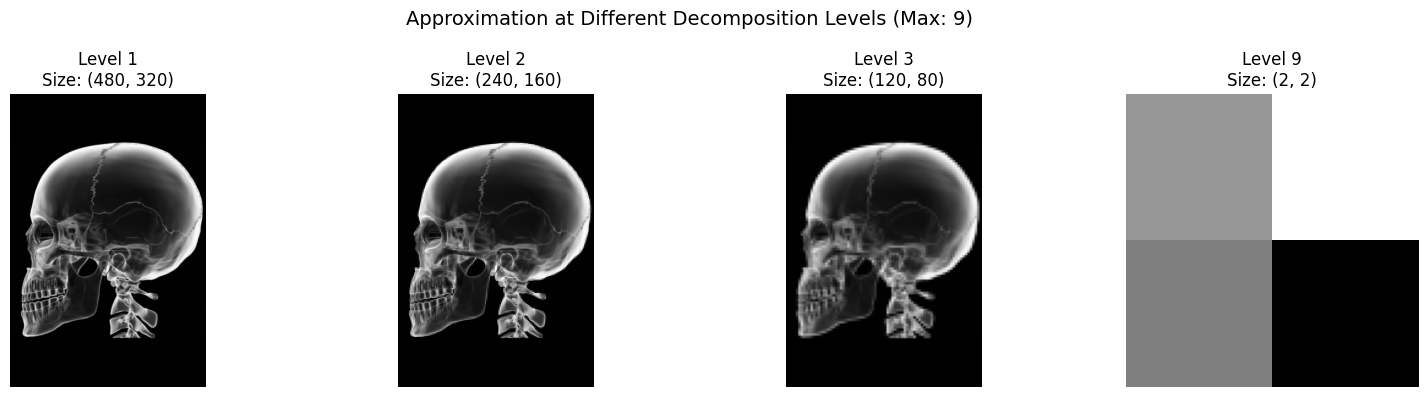


At level 9, approximation size: (2, 2)


In [7]:
# Calculate maximum decomposition level
max_level = pywt.dwt_max_level(min(image.shape), pywt.Wavelet('haar').dec_len)
print(f"Image shape: {image.shape}")
print(f"Maximum decomposition level: {max_level}")

# Visualize multiple levels
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, level in enumerate([1, 2, 3, max_level]):
    coeffs = pywt.wavedec2(image, 'haar', level=level)
    LL = coeffs[0]
    
    axes[i].imshow(LL, cmap='gray')
    axes[i].set_title(f'Level {level}\nSize: {LL.shape}')
    axes[i].axis('off')

plt.suptitle(f'Approximation at Different Decomposition Levels (Max: {max_level})', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nAt level {max_level}, approximation size: {coeffs[0].shape}")

## Part 4: Wavelet vs Fourier — Time‑Frequency Localization and Practical Tradeoffs

When to use which:

- Wavelets: localized transients, edges, and multi‑scale feature extraction (medical imaging, denoising, compression).
- Fourier: stationary periodic textures and global frequency analysis (spectral estimation, periodic pattern detection).

In short: for images with localized features across scales (e.g., anatomical edges plus texture), wavelets are typically more informative and more amenable to sparse, compressible representations.

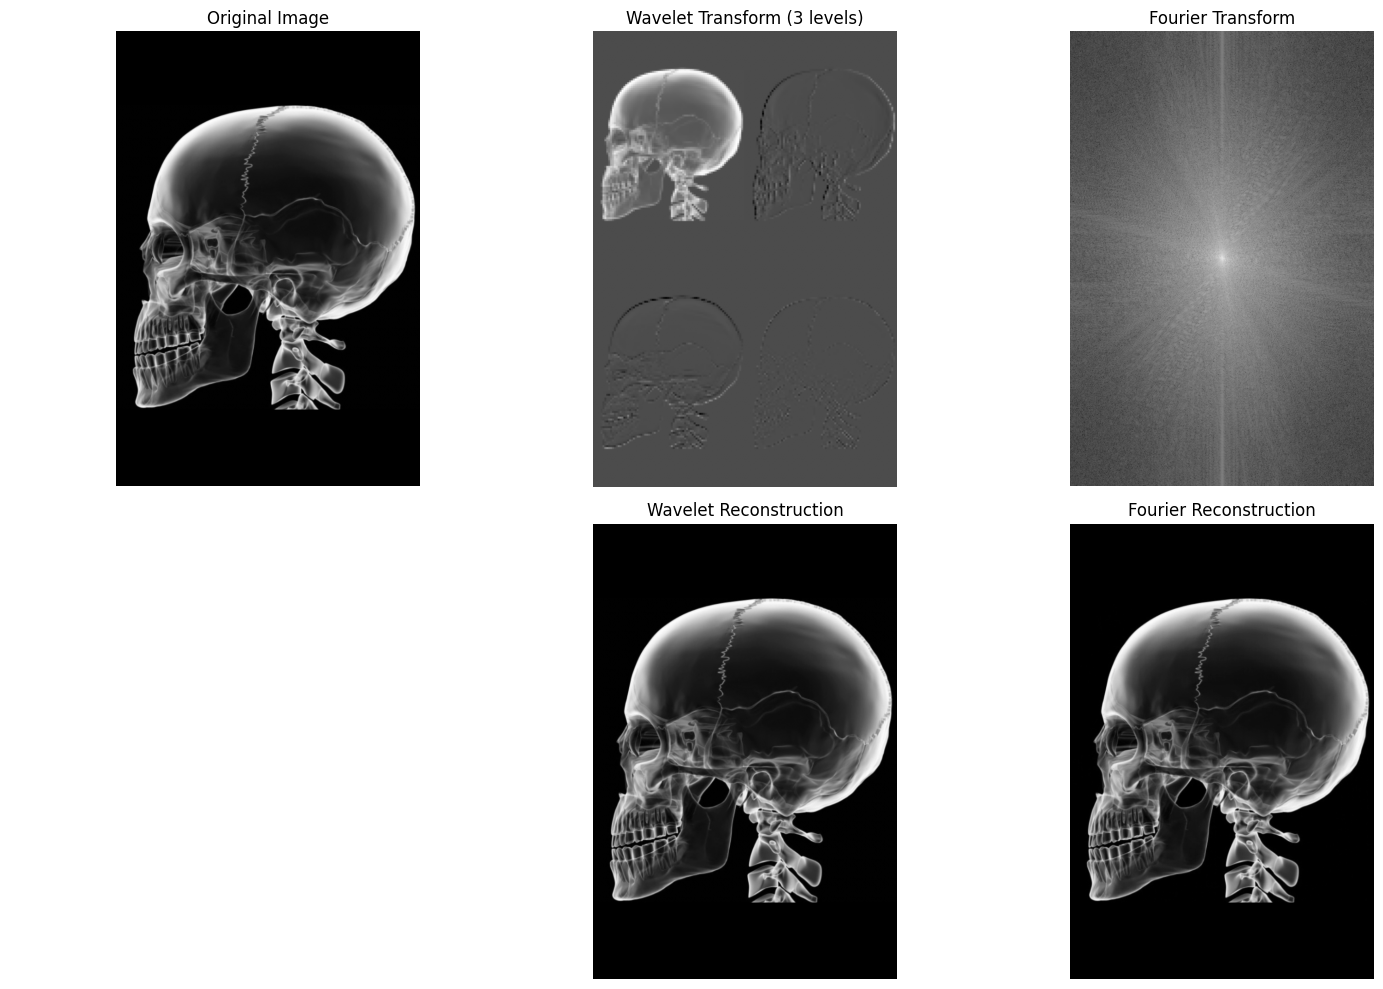

Wavelet Transform: Preserves spatial + frequency information
Fourier Transform: Only frequency information, no spatial localization


In [8]:
# Compare Wavelet and Fourier representations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Wavelet decomposition visualization
coeffs = pywt.wavedec2(image, 'haar', level=3)
LL, (LH3, HL3, HH3), (LH2, HL2, HH2), (LH1, HL1, HH1) = coeffs

# Combine wavelet bands for visualization
wavelet_combined = np.hstack([
    np.vstack([LL, LH3]),
    np.vstack([HL3, HH3])
])
axes[0, 1].imshow(wavelet_combined, cmap='gray')
axes[0, 1].set_title('Wavelet Transform (3 levels)')
axes[0, 1].axis('off')

# Fourier transform
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)
magnitude = np.log(1 + np.abs(fft_shifted))

axes[0, 2].imshow(magnitude, cmap='gray')
axes[0, 2].set_title('Fourier Transform')
axes[0, 2].axis('off')

# Reconstructions
reconstructed_wt = pywt.waverec2(coeffs, 'haar')
reconstructed_wt = np.clip(reconstructed_wt, 0, 255).astype(np.uint8)

reconstructed_ft = np.fft.ifft2(fft).real
reconstructed_ft = np.clip(reconstructed_ft, 0, 255).astype(np.uint8)

axes[1, 0].axis('off')

axes[1, 1].imshow(reconstructed_wt, cmap='gray')
axes[1, 1].set_title('Wavelet Reconstruction')
axes[1, 1].axis('off')

axes[1, 2].imshow(reconstructed_ft, cmap='gray')
axes[1, 2].set_title('Fourier Reconstruction')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Wavelet Transform: Preserves spatial + frequency information")
print("Fourier Transform: Only frequency information, no spatial localization")

## Part 5: Denoising, Threshold Selection and Smoothing


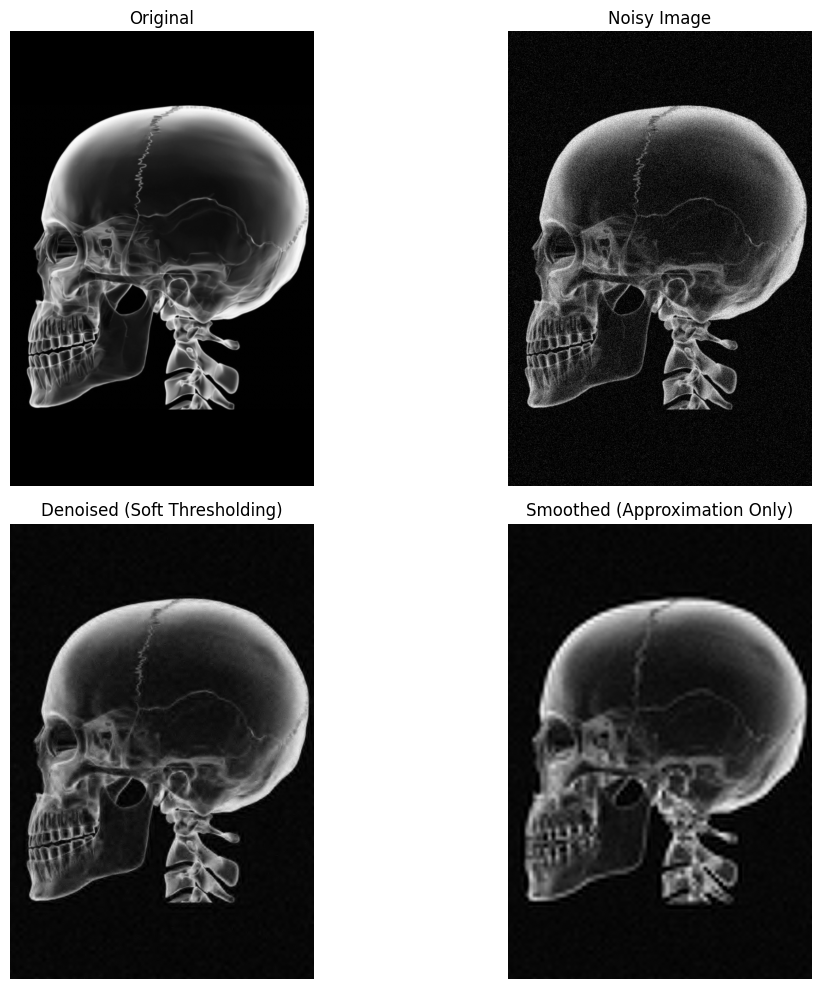

PSNR - Noisy: 30.12 dB
PSNR - Denoised: 31.49 dB (improvement: 1.36 dB)


In [ ]:
# Add noise to image
noisy_image = image + np.random.normal(0, 20, image.shape)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# 1. Denoising: Threshold detail coefficients
coeffs = pywt.wavedec2(noisy_image, 'db4', level=3)
threshold = 30  

# Zero out small coefficients in detail bands
coeffs_denoised = [coeffs[0]] + [
    tuple(pywt.threshold(d, threshold, mode='soft') for d in detail)
    for detail in coeffs[1:]
]

denoised = pywt.waverec2(coeffs_denoised, 'db4')
denoised = np.clip(denoised, 0, 255).astype(np.uint8)

# 2. Smoothing: Keep only approximation
coeffs_smooth = [coeffs[0]] + [
    tuple(np.zeros_like(d) for d in detail)
    for detail in coeffs[1:]
]

smoothed = pywt.waverec2(coeffs_smooth, 'db4')
smoothed = np.clip(smoothed, 0, 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_image, cmap='gray')
axes[0, 1].set_title('Noisy Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(denoised, cmap='gray')
axes[1, 0].set_title('Denoised (Soft Thresholding)')
axes[1, 0].axis('off')

axes[1, 1].imshow(smoothed, cmap='gray')
axes[1, 1].set_title('Smoothed (Approximation Only)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Calculate PSNR
psnr_noisy = 10 * np.log10(255**2 / np.mean((image - noisy_image) ** 2))
psnr_denoised = 10 * np.log10(255**2 / np.mean((image - denoised) ** 2))

print(f"PSNR - Noisy: {psnr_noisy:.2f} dB")
print(f"PSNR - Denoised: {psnr_denoised:.2f} dB (improvement: {psnr_denoised - psnr_noisy:.2f} dB)")